# ImageNet - Human Study Analysis

In [1]:
DATA_SET = 'ImageNet'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd  
import numpy as np

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Reading Data

In [4]:
df = pd.read_csv('../data/ImageNet-Human-Study-Summary.csv')

In [5]:
df.head(5)

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real
0,6386009,ILSVRC2012_val_00027121.JPEG,0,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n02112350,carnivore,canine,dog,1,Easy,1.0,keeshond,keeshond,keeshond,keeshond,0.99,1.00,1.00,1.0,['keeshond'],['n02112350'],['carnivore'],['canine'],['dog']
1,6386009,ILSVRC2012_val_00008987.JPEG,0,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n01980166,invertebrate,invertebrate,invertebrate,1,Easy,0.9,fiddler_crab,fiddler_crab,fiddler_crab,fiddler_crab,0.99,0.95,0.90,0.9,['fiddler_crab'],['n01980166'],['invertebrate'],['invertebrate'],['invertebrate']
2,6386009,ILSVRC2012_val_00043672.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,0,0.733333,22,CHM-NN,n02093428,carnivore,canine,dog,0,Medium,0.6,American_Staffordshire_terrier,American_Staffordshire_terrier,American_Staffordshire_terrier,American_Staffordshire_terrier,0.62,0.85,0.75,0.6,['vizsla'],['n02100583'],['carnivore'],['canine'],['dog']
3,6386009,ILSVRC2012_val_00011479.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n04350905,commodity,commodity,commodity,0,Easy,0.2,suit,suit,suit,unicycle,0.33,0.15,0.20,0.2,"['suit', 'Windsor_tie']","['n04350905', 'n04591157']","['commodity', 'commodity']","['commodity', 'commodity']","['commodity', 'commodity']"
4,6386009,ILSVRC2012_val_00034787.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,0,0.733333,22,CHM-NN,n07754684,natural_object,natural_object,natural_object,1,Medium,0.4,jackfruit,jackfruit,jackfruit,jackfruit,0.98,0.70,0.45,0.4,['jackfruit'],['n07754684'],['natural_object'],['natural_object'],['natural_object']


## Orders for Plotting

In [6]:
ORDER_DICT = {'ResNet-50': 1,
              'kNN': 2,
              'EMD-NN':  3,
              'EMD-Corr': 4,
              'CHM-NN': 5,
              'CHM-Corr': 6}

In [7]:
print(f"total {len(df)} entries")

total 10800 entries


In [8]:
(df.groupby(['UID', 'Method'])['Query'].count().groupby('Method').sum()/30).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Query
4,ResNet-50,60.0
5,kNN,60.0
3,EMD-NN,60.0
2,EMD-Corr,60.0
1,CHM-NN,60.0
0,CHM-Corr,60.0


## Removing Bad Users 

We manually marked two users as **bad** based on their average performance on `1:1` ratio samples

1. `6395881` 
1. `6396044`

We also added `6386000, 6382894, 6385998, 6382878`

In [9]:
df = df[~df['UID'].isin([6395881, 6396044, 6386000, 6382894, 6385998, 6382878])]

In [10]:
print(f"total {len(df)} entries")

total 10620 entries


In [11]:
df = df.sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

# Basic Analysis

## Human+AI Accuracy

In [12]:
accuracy_df = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df['mean']*=100
accuracy_df['std']*=100

In [13]:
accuracy_df

,Method,mean,std
4,ResNet-50,81.555556,5.539336
5,kNN,75.762712,8.550739
3,EMD-NN,77.719298,8.265387
2,EMD-Corr,78.870056,6.568536
1,CHM-NN,77.555556,6.912601
0,CHM-Corr,77.231638,7.559535


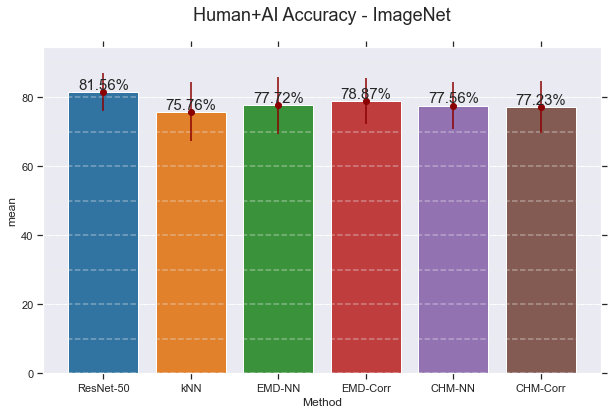

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.barplot(data=accuracy_df, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title(f'Human+AI Accuracy - {DATA_SET}\n', fontsize=18)
plt.errorbar(accuracy_df['Method'], accuracy_df['mean'], yerr=accuracy_df['std'], fmt="o", color="darkred")
plt.show()

## Counter Balance

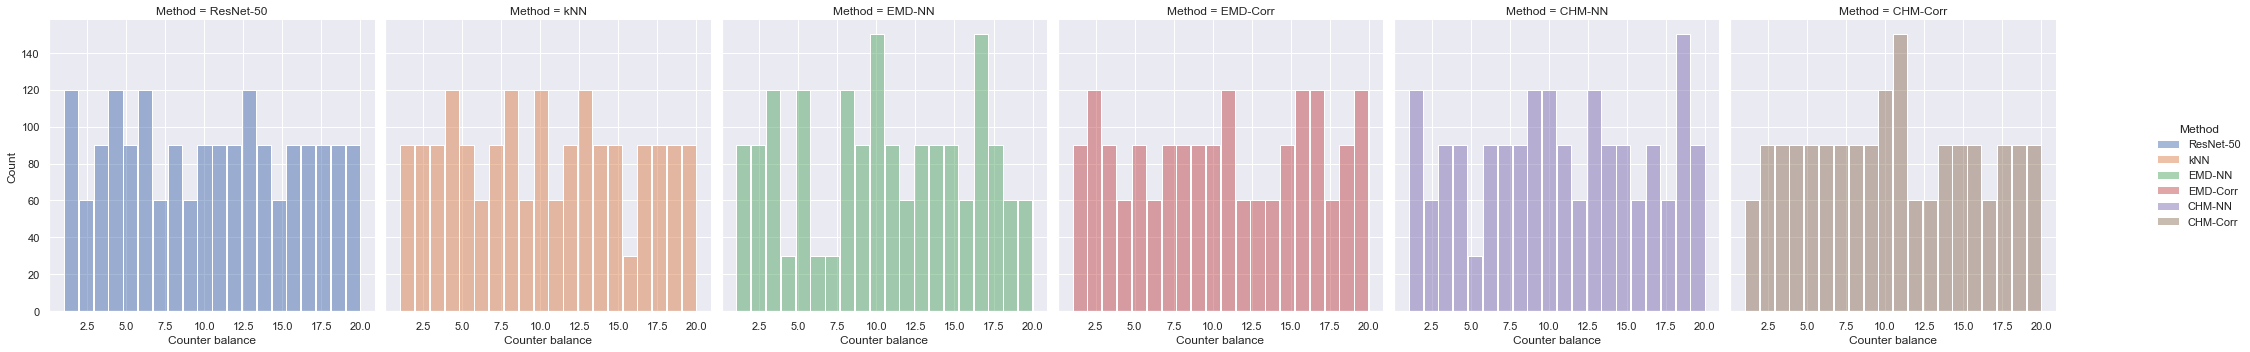

In [15]:
sns.displot(
    df, x="Counter balance", col="Method", bins=20 ,kde=False, common_bins=False,
    height=5, facet_kws=dict(margin_titles=True), hue="Method", shrink=.95
)

plt.show()

## Time to Finish

In [16]:
df.head(2)

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real
3524,6382823,ILSVRC2012_val_00016004.JPEG,0,1,13,10,603548.3,306339,2022-04-29 16:44:20.656,10,0,23,1,0.766667,23,ResNet-50,n03775071,commodity,commodity,commodity,1,Easy,0.91,mitten,mitten,mitten,mitten,0.91,0.8,1.0,0.95,['mitten'],['n03775071'],['commodity'],['commodity'],['commodity']
2394,6385941,ILSVRC2012_val_00000304.JPEG,0,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,1,0.800000,24,ResNet-50,n12985857,fungus,fungus,fungus,1,Easy,0.98,coral_fungus,coral_fungus,coral_fungus,coral_fungus,0.98,1.0,1.0,1.00,['coral_fungus'],['n12985857'],['fungus'],['fungus'],['fungus']


In [17]:
raw_time_df = df.groupby(['Method'])['Test Reaction Time'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [18]:
raw_time_df['mean'] /= 1000.0
raw_time_df['std'] /= 1000.0

In [19]:
raw_time_df

,Method,mean,std
4,ResNet-50,407.075233,118.485793
5,kNN,423.570932,134.259272
3,EMD-NN,413.534175,104.137945
2,EMD-Corr,460.331644,168.228786
1,CHM-NN,344.676583,144.478931
0,CHM-Corr,582.431339,298.282914


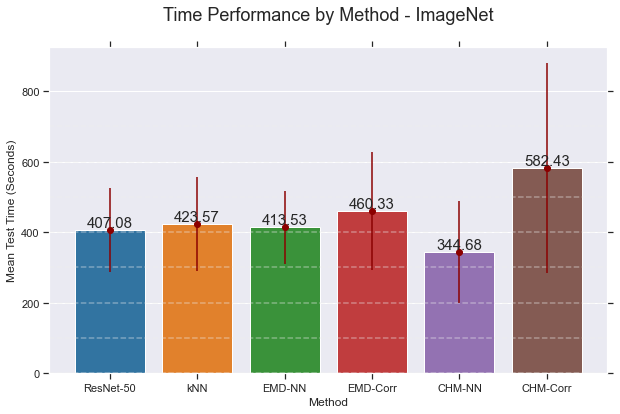

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.barplot(data=raw_time_df, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f')
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title(f'Time Performance by Method - {DATA_SET}\n', fontsize=18)
plt.errorbar(raw_time_df['Method'], raw_time_df['mean'], yerr=raw_time_df['std'], fmt="o", color="darkred")
plt.ylabel('Mean Test Time (Seconds)')
plt.show()

In [21]:
all_raw_time_df = df.groupby(['Method'])['Test Reaction Time'].agg(lambda x: list(x/1000/30)).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [22]:
all_raw_time_df

,Method,Test Reaction Time
4,ResNet-50,"[10.2113, 10.514866666666668, 10.5148666666666..."
5,kNN,"[11.8346, 11.8346, 12.155333333333335, 10.8005..."
3,EMD-NN,"[11.442933333333334, 11.442933333333334, 11.44..."
2,EMD-Corr,"[15.364533333333332, 15.364533333333332, 15.36..."
1,CHM-NN,"[11.360899999999999, 11.625599999999999, 10.79..."
0,CHM-Corr,"[11.495233333333335, 12.9998, 23.0569666666666..."


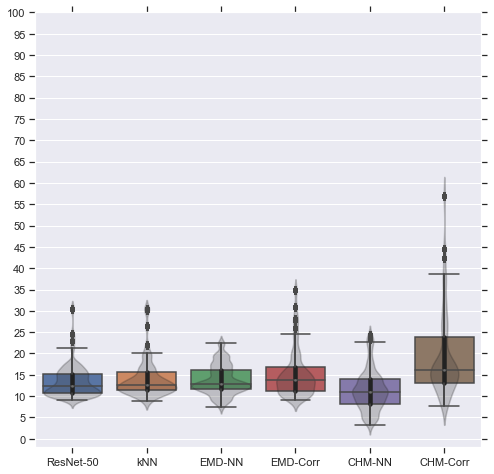

In [23]:
fig, ax = plt.subplots(1, figsize=(8, 8), facecolor=(1,1,1))
sns.violinplot(data=[all_raw_time_df['Test Reaction Time'][x] for x in [4,5,3,2,1,0]], ax=ax, color=".22",)
sns.boxplot(data=[all_raw_time_df['Test Reaction Time'][x] for x in [4,5,3,2,1,0]], ax=ax)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

ax.set_xticklabels([x for x in ORDER_DICT.keys()])
# plt.title(f'Time Performance - {DATA_SET} - (Seconds)', fontsize=16, pad=20)
plt.setp(ax.collections, alpha=.25)

# ax.set_yticks(range(0, 70, 5))
ax.set_yticks(range(0, 105, 5))
plt.savefig(f'../plots/human-study-main-results/ImageNet-Time-Performance.pdf', dpi=100, bbox_inches='tight')
plt.show()

# Accuracy Breakdown

## Difficulty Level

In [ ]:
df_difflevel = df.groupby(['UID', 'Method', 'DifficultyLevel', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()
df_difflevel['mean'] = df_difflevel['mean']*100

In [ ]:
df_difflevel.head()

In [ ]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", row="ClassifierCorrectness", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, fmt='%.2f%%', label_type='center')

  plt.ylim(0, 105)
  
  axes = g.axes.flatten()
  for ci, C in enumerate(['Wrong', 'Correct']):
    for di, D in enumerate(['Easy', 'Medium', 'Hard']):
      axes[(ci*3)+di].set_title(f"AI:{C} | Difficulty Category:{D}")

  axes[0].set_ylabel('Average human accuracy')
  axes[3].set_ylabel('Average human accuracy')
  plt.savefig(f'../plots/human-study-main-results/ImageNet-Difficulty-vs-AICorrectNess.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [ ]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, fmt='%.2f%%', label_type='center')

  plt.ylim(0, 105)
  
  axes = g.axes.flatten()
  plt.savefig(f'../plots/human-study-main-results/ImageNet-Difficulty-Ony.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [ ]:
df_correctness = df.groupby(['UID', 'Method', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()
df_correctness['mean'] *=100

In [ ]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_correctness, col="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='center', fmt='%.2f%%')

  axes = g.axes.flatten()
  axes[0].set_ylabel('Average human Accuracy')
  
  axes[0].set_title('AI is Wrong')
  axes[1].set_title('AI is Correct')
  
  plt.savefig(f'../plots/human-study-main-results/ImageNet-AICorrectNess-Performance.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [ ]:
df_diff_count = df.groupby(['Method', 'ClassifierCorrectness', 'DifficultyLevel'])['UID'].count().reset_index()

In [ ]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_diff_count, col="DifficultyLevel", row="ClassifierCorrectness", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "UID", order=df.Method.unique(), palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='edge')

  axes = g.axes.flatten()
  for ci, C in enumerate(['Wrong', 'Correct']):
    for di, D in enumerate(['Easy', 'Medium', 'Hard']):
      axes[(ci*3)+di].set_title(f"AI:{C} | Difficulty Category:{D}")
      
  axes[0].set_ylabel('Number of Queries')
  axes[3].set_ylabel('Number of Queries')
  plt.savefig(f'../plots/human-study-main-results/ImageNet-Difficulty-vs-AICorrectNess-Counts.pdf', dpi=100, bbox_inches='tight')
  plt.show()

## Prior Knowledge

In [ ]:
df_pk = df.groupby(['UID', 'Method', 'Prior Knowledge', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()

In [ ]:
with sns.plotting_context('paper', font_scale = 1.4):

  g = sns.FacetGrid(df_pk, col="Prior Knowledge", row="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "mean", order=df.Method.unique(), palette="tab10")

  [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=14)

  plt.show()

# Statistical Significance

In [ ]:
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [ ]:
data_for_analysis = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index()
data_for_analysis = data_for_analysis.groupby('Method')['Correctness'].agg(lambda x: list(x)).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [ ]:
data_for_analysis

In [ ]:
data_for_analysis_dict = {}
for i, row in data_for_analysis.iterrows():
  data_for_analysis_dict[row['Method']] = row['Correctness']

In [ ]:
data_for_analysis_dict.keys()

In [ ]:
pairs = [( 'ResNet-50', 'kNN'),
          ('ResNet-50', 'EMD-NN'),
          ('ResNet-50', 'EMD-Corr'),
          ('ResNet-50', 'CHM-NN'),
          ('ResNet-50', 'CHM-Corr'),
          ('kNN', 'EMD-NN'),
          ('kNN', 'EMD-Corr'),
          ('kNN', 'CHM-NN'),
          ('kNN', 'CHM-Corr'),
          ('EMD-NN', 'EMD-Corr'),
          ('EMD-NN', 'CHM-NN'),
          ('EMD-NN', 'CHM-Corr'),
          ('EMD-Corr', 'CHM-NN'),
          ('EMD-Corr', 'CHM-Corr'),
          ('CHM-NN', 'CHM-Corr')]

pvalues = [
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['kNN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['EMD-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['ResNet-50'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['EMD-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['kNN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['EMD-Corr'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-NN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['EMD-Corr'], data_for_analysis_dict['CHM-NN'], alternative="two-sided").pvalue,
  mannwhitneyu(data_for_analysis_dict['EMD-Corr'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
  
  mannwhitneyu(data_for_analysis_dict['CHM-NN'], data_for_analysis_dict['CHM-Corr'], alternative="two-sided").pvalue,
]

formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

In [ ]:
selected_pairs = []
selected_pvalues = []
selected_pvalues_f = []

for pv, pi, fpv in  zip(pvalues, pairs, formatted_pvalues):
  if pv <= 0.05:
    selected_pairs.append(pi)
    selected_pvalues.append(pv)
    selected_pvalues_f.append(fpv)

In [ ]:
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=6)

plotting_parameters = {
    'data':    df.groupby(['UID', 'Method'])['User Accuracy'].mean().reset_index(),
    'x':       'Method',
    'y':       'User Accuracy',
    'palette': 'tab10'
}



with sns.plotting_context('notebook', font_scale = 1.4):
  # Create new plot
  fig, ax = plt.subplots(1, figsize=(8, 6), facecolor=(1,1,1))

  # Plot with seabornz
  sns.boxplot(**plotting_parameters)

  # Add annotations
  annotator = Annotator(ax, selected_pairs, **plotting_parameters)
  annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
  annotator.set_custom_annotations(selected_pvalues_f)
  annotator.apply_and_annotate()

  # Label and show
  plt.title(f"RAW DATA - Unbalanced", y=1.06)
  ax.set_ylabel("Accuracy")
  ax.set_xlabel("Method", labelpad=20)
  plt.gca().set_ylim(bottom=0.4)
  plt.gca().set_ylim(top=1.5)
  plt.yticks(np.arange(0.5, 1.01, 0.1))
  # plt.ylim(0.5, 1)
  plt.show()

In [53]:
Accept_Reject = []
Accepts = []
Rejects = []

for i, j in df[['Correctness', 'ClassifierCorrectness']].values:
  if i == 1 and j == 1:
    Accept_Reject.append('Accept')
    Accepts.append(1)
    Rejects.append(0)
  elif i == 0 and j == 1:
    Accept_Reject.append('Reject')
    Accepts.append(0)
    Rejects.append(1)
  elif i == 1 and j == 0:
    Accept_Reject.append('Reject')
    Accepts.append(0)
    Rejects.append(1)
  elif i == 0 and j == 0: 
    Accept_Reject.append('Accept')
    Accepts.append(1)
    Rejects.append(0)
  else:
    raise

In [54]:
df['AcceptReject'] = Accept_Reject
df['Accepted']     = Accepts
df['Rejected'] = Rejects

In [55]:
df.groupby(['Method'])[['Accepted' , 'Rejected']].sum().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Accepted,Rejected
4,ResNet-50,1088,712
5,kNN,1232,538
3,EMD-NN,1154,556
2,EMD-Corr,1149,621
1,CHM-NN,1241,559
0,CHM-Corr,1195,575


In [56]:
df.groupby(['DifficultyLevel'])[['Accepted' , 'Rejected']].sum().reset_index()

,DifficultyLevel,Accepted,Rejected
0,Easy,4167,1565
1,Hard,572,345
2,Medium,2320,1651
